In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [449]:
import statsmodels.api as sm

In [737]:
beauty = pd.read_csv('wards_beauty_score.csv')

In [740]:
flickr = pd.read_csv('Ward_Flicker_nature_tags.csv')

In [756]:
flickr[:4]

,Unnamed: 0,GSS_CODE,Total,Nature
0,0,E05000026,32748,519
1,1,E05000027,12155,1240
2,2,E05000028,4706,174
3,3,E05000029,6745,44


In [743]:
beauty['ward_name'] = beauty['ward_name'].apply(lambda x: x.replace(' Ward',''))

In [745]:
len(beauty)

627

In [746]:
beauty[:10]

,Unnamed: 0,ward_name,bscore
0,0,Chessington South,0.563107
1,1,Tolworth and Hook Rise,0.466667
2,2,Berrylands,0.741379
3,3,Alexandra,0.638554
4,4,Beverley,0.582278
5,5,Coombe Hill,0.503356
6,6,Chessington North and Hook,0.389610
7,7,Surbiton Hill,0.925373
8,8,Old Malden,0.675325
9,9,St. Mark's,0.745455


In [747]:
jsa = pd.read_csv('Claimant_Count_Model_2015.csv')
jsa.head()

,GSS_CODE,WDNAME,OACODE,All ages,All ages.1,All ages.2,Age 18-24,Age 25-44,Age 45-64,Age 18-24.1,Age 25-44.1,Age 45-64.1,Age 18-24.2,Age 25-44.2,Age 45-64.2
0,E05000026,Abbey,00ABFX,6724.0,4061.0,2663.0,612.0,4756.0,1356.0,319.0,2857.0,885.0,293.0,1899.0,471.0
1,E05000027,Alibon,00ABFY,4877.0,2559.0,2318.0,564.0,2587.0,1726.0,304.0,1336.0,919.0,260.0,1251.0,807.0
2,E05000028,Becontree,00ABFZ,6401.0,3439.0,2962.0,731.0,3734.0,1936.0,383.0,2001.0,1055.0,348.0,1733.0,881.0
3,E05000029,Chadwell Heath,00ABGA,4577.0,2414.0,2163.0,579.0,2291.0,1707.0,299.0,1220.0,895.0,280.0,1071.0,812.0
4,E05000030,Eastbrook,00ABGB,5259.0,2796.0,2463.0,793.0,2358.0,2108.0,430.0,1261.0,1105.0,363.0,1097.0,1003.0


In [748]:
len(jsa)

681

In [749]:
beauty_merged = pd.merge(jsa , beauty , left_on='WDNAME' , right_on='ward_name')

In [751]:
len(beauty_merged)

605

In [752]:
jsa_merged = pd.merge(beauty_merged , flickr , left_on='GSS_CODE' , right_on='GSS_CODE')

In [754]:
len(jsa_merged)

554

In [825]:
income = pd.read_csv('modelled-household-income-estimates-wards.csv', engine='python')
for column in income.columns: 
    income[column] =  income[column].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    income[column] =  income[column].apply(lambda x: x.replace(',',''))
merged_socio = pd.merge(income,jsa_merged,left_on='Code' , right_on='GSS_CODE')
selected_socio = merged_socio[['GSS_CODE','All ages','Median 2012/13' , 'bscore' , 'Total' , 'Nature']]
selected_socio = selected_socio.rename(columns={'All ages':'All_jsa'})

In [826]:
len(selected_socio)

554

In [827]:
selected_socio.head()

,GSS_CODE,All_jsa,Median 2012/13,bscore,Total,Nature
0,E05000026,6724.0,33920,0.616279,32748,519
1,E05000027,4877.0,32470,0.319149,12155,1240
2,E05000028,6401.0,33000,0.560606,4706,174
3,E05000029,4577.0,33920,0.390244,6745,44
4,E05000030,5259.0,37400,0.426230,72372,949


In [828]:
Ward_IMD = json.load(open('Ward_index_deprivation.json'))

ward = {'GSS_CODE': [] , 'IMD' : []}
for k in Ward_IMD:
    ward['GSS_CODE'].append(k)
    ward['IMD'].append(Ward_IMD[k])
wardDf = pd.DataFrame.from_dict(ward)

theData = pd.read_csv('Merged_all_disease_green_sat.csv')

In [829]:
data_1 = pd.merge(theData,wardDf,left_on='GSS_CODE' , right_on='GSS_CODE')

In [830]:
data = pd.merge(data_1,selected_socio,left_on='GSS_CODE' , right_on='GSS_CODE')

In [831]:
len(data)

414

In [832]:
data['All_jsa'] = data['All_jsa']/data['population']
data['Sex_ratio'] = data['male']/data['female']
data['Flickr_score'] = data['Nature']/data['Total']

In [833]:
list(data.columns)

['Unnamed: 0',
 'green_score',
 'GSS_CODE',
 'tree_pixels',
 'grass_pixels',
 'urban_pixels',
 'npix',
 'tree_pct',
 'grass_pct',
 'urban_pct',
 'borough_name_x',
 'TreePixelDensity',
 'TreeDensity',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions',
 'hypothyroidism_Prevalence',
 'dementia_Prescriptions',
 'dementia_Prevalence',
 'rheumatoid_Prescriptions',
 'rheumatoid_Prevalence',
 'depression_Prescriptions',
 'depression_Prevalence',
 'diabete

In [842]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','All_jsa','Median 2012/13']
nutrient = ['weight','h_nutrients_weight_norm','h_nutrients_calories_norm']
green = ['TreePixelDensity','GLUD_Area of Greenspace PCT']
Flickr = ['Flickr_score']
beauty = ['bscore']

# X_dims = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','weight','num_transactions','All_jsa','Mean 2012/13']
X_dims =  socio_economic + nutrient  + Flickr + beauty
X_dims_2 = socio_economic + nutrient + green +  Flickr + beauty

print(X_dims , X_dims_2)
Y_dims = ['depression_Prevalence']
tree_dims = ['TreePixelDensity','TreeDensity','LCM_tree_pct','GLUD_Area of Greenspace PCT']

X = np.array(data[X_dims].values,dtype=np.float32)
X_2= np.array(data[X_dims_2].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)

X_prime = np.array(data[tree_dims].values,dtype=np.float32)
min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X2 = min_max_scaler.fit_transform(X_2)
Y = min_max_scaler.fit_transform(Y)

['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'weight', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'Flickr_score', 'bscore'] ['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'weight', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'TreePixelDensity', 'GLUD_Area of Greenspace PCT', 'Flickr_score', 'bscore']


In [843]:
X = sm.add_constant(X)
X2 = sm.add_constant(X2)

In [844]:
X.shape

(414, 12)

In [845]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [846]:
model_2 = sm.OLS(Y, X2).fit()
predictions_2 = model_2.predict(X2)

In [847]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     16.08
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           3.55e-26
Time:                        11:27:58   Log-Likelihood:                 293.35
No. Observations:                 414   AIC:                            -562.7
Df Residuals:                     402   BIC:                            -514.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4585      0.064      7.141      0.000       0.332       0.585
x1             0.0973      0.047      2.085      0.038       0.006       0.189
x2            -0.0744      0.050     -1.479      0.140      -0.173       0.025
x3             0.0773      0.064      1.202      0.230      -0.049       0.204
x4            -0.2271      0.058     -3.912      0.000      -0.341      -0.113
x5             0.0503      0.053      0.957      0.339      -0.053       0.154
x6            -0.2627      0.088     -2.984      0.003      -0.436      -0.090
x7            -0.2919      0.040     -7.295      0.000      -0.371      -0.213
x8             0.1170      0.093      1.260      0.209      -0.066       0.300
x9            -0.0641      0.108     -0.591      0.555      -0.277       0.149
x10            0.0988      0.057      1.721      0.086      -0.014       0.212
x11            0.0849      0.034      2.467      0.014       0.017       0.153
==============================================================================
Omnibus:                       17.232   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.344
Skew:                           0.410   Prob(JB):                     3.82e-05
Kurtosis:                       3.711   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [848]:
X_dims_2

['avg_age',
 'IMD',
 'people_per_sq_km',
 'Sex_ratio',
 'All_jsa',
 'Median 2012/13',
 'weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories_norm',
 'TreePixelDensity',
 'GLUD_Area of Greenspace PCT',
 'Flickr_score',
 'bscore']

In [849]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           2.75e-26
Time:                        11:28:01   Log-Likelihood:                 296.70
No. Observations:                 414   AIC:                            -565.4
Df Residuals:                     400   BIC:                            -509.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4393      0.065      6.745      0.000       0.311       0.567
x1             0.1034      0.047      2.198      0.029       0.011       0.196
x2            -0.1378      0.089     -1.544      0.123      -0.313       0.038
x3             0.0501      0.065      0.772      0.440      -0.077       0.178
x4            -0.2158      0.058     -3.723      0.000      -0.330      -0.102
x5             0.0694      0.053      1.312      0.190      -0.035       0.173
x6            -0.2379      0.089     -2.673      0.008      -0.413      -0.063
x7            -0.2750      0.040     -6.812      0.000      -0.354      -0.196
x8             0.1083      0.092      1.171      0.242      -0.073       0.290
x9            -0.0888      0.108     -0.819      0.413      -0.302       0.124
x10            0.1082      0.049      2.198      0.029       0.011       0.205
x11            0.1018      0.078      1.313      0.190      -0.051       0.254
x12            0.0974      0.059      1.656      0.098      -0.018       0.213
x13            0.0417      0.038      1.084      0.279      -0.034       0.117
==============================================================================
Omnibus:                       15.134   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.262
Skew:                           0.362   Prob(JB):                     0.000108
Kurtosis:                       3.731   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [850]:
np.corrcoef(predictions_2,Y[:,0])

array([[1.        , 0.56274795],
       [0.56274795, 1.        ]])

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


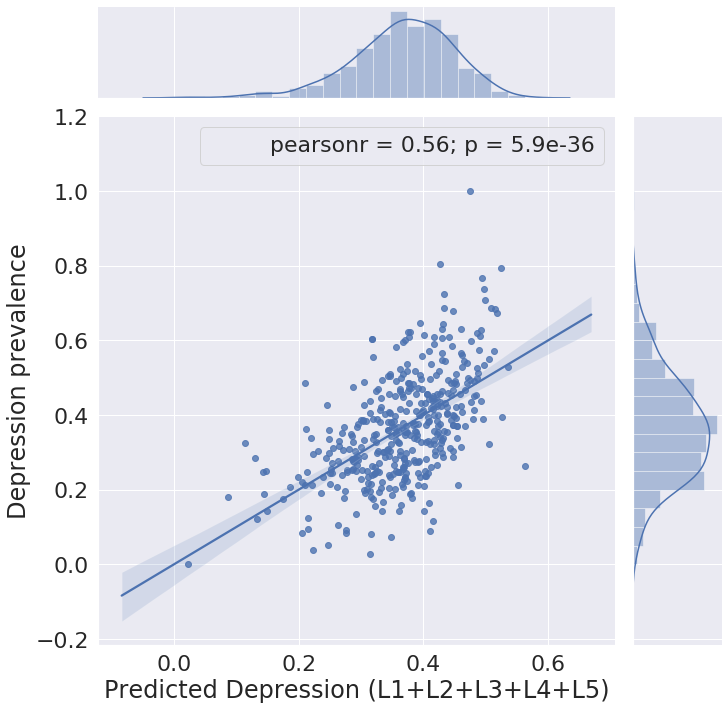

In [855]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_2, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L3+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

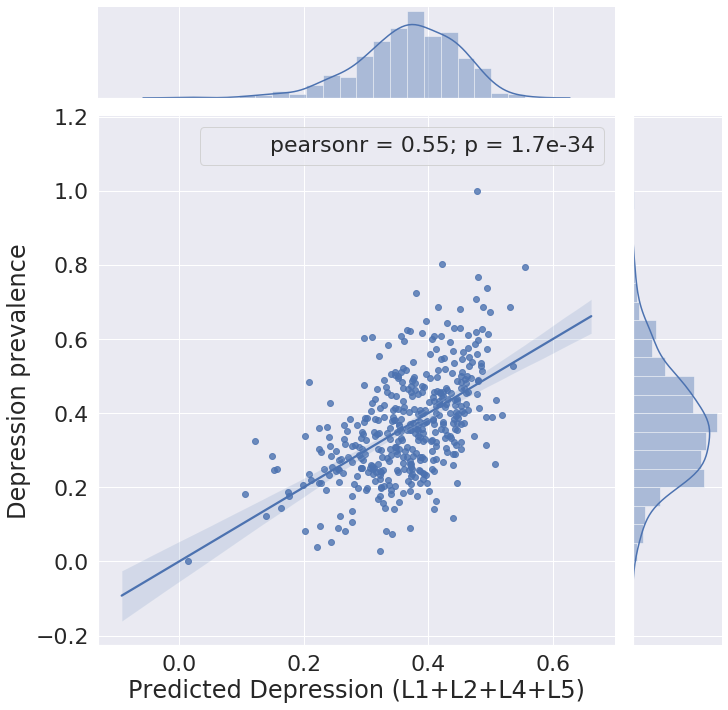

In [856]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

In [803]:
residuals = np.array([predictions_2[k] - Y[k,0] for k in range(len(predictions_2))] , dtype = np.float32)

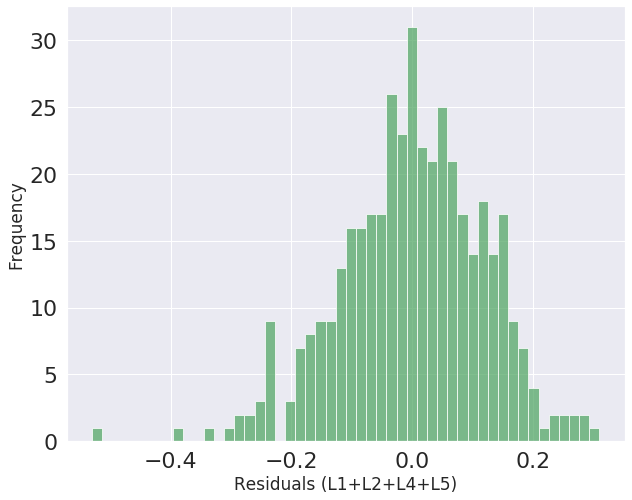

In [805]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('Residuals (L1+L2+L4+L5)',fontsize=17)
n1 , bins1 , patches1 = plt.hist(residuals, 50, facecolor='g', alpha=0.75)
# n2 , bins2 , patches2 = plt.hist(Y[:,0], 50, facecolor='r', alpha=0.75)
plt.show()

In [806]:
results_df = {'GSS_CODE':[] , 'Normalized_depression' :[] ,'Predict_L1':[] , 'Predict_L2':[] , 'Residual_L1': [] ,'Res'}
for index, row in data.iterrows():
    results_df['GSS_CODE'].append(row['GSS_CODE'])
    results_df['Normalized_depression'].append(Y[index][0])
    results_df['Predict_L1'].append(predictions[index])
    results_df['Predict_L2'].append(predictions_2[index])
    results_df['Residual_L1'].append(residuals[index])
results = pd.DataFrame.from_dict(results_df)
results.head()

,GSS_CODE,Normalized_depression,Predict_L1,Predict_L2,Residual_L1
0,E05000420,0.381794,0.292118,0.314931,-0.066863
1,E05000571,0.492230,0.445223,0.453387,-0.038844
2,E05000570,0.794825,0.505291,0.552014,-0.242811
3,E05000572,0.304906,0.445630,0.438556,0.133651
4,E05000620,0.446438,0.332182,0.340027,-0.106411


In [808]:
green = np.array(X_prime[:,0],dtype = np.float32)

In [809]:
residuals[0]

-0.06686264

In [810]:
green.shape, residuals.shape

((414,), (414,))

In [811]:
r = np.corrcoef(residuals, green)
print(r )

[[ 1.         -0.07543809]
 [-0.07543809  1.        ]]


/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


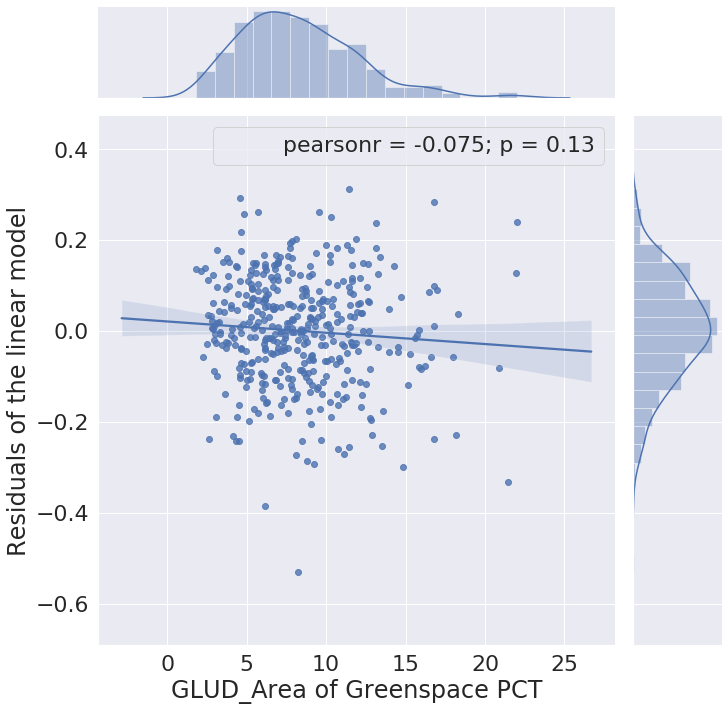

In [812]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=green, y=residuals, kind='regression',height=10);
plt.xlabel('GLUD_Area of Greenspace PCT')
plt.ylabel('Residuals of the linear model')
ax.annotate(pearsonr)

In [570]:
from sklearn import linear_model

In [817]:
df = data[X_dims_2]

In [818]:
df.head()

,avg_age,IMD,people_per_sq_km,Sex_ratio,All_jsa,Mean 2012/13,weight,h_nutrients_weight_norm,h_nutrients_calories_norm,Flickr_score,bscore
0,33.195192,8.91957,14246.666667,0.983525,0.557674,40490,440.669488,0.712779,0.675817,0.002488,0.617978
1,34.208704,41.70052,5918.048780,0.933078,0.530168,39290,303.275663,0.707125,0.671743,0.011122,0.697674
2,40.219281,18.26981,6259.883721,0.909381,0.509148,46490,281.894402,0.705212,0.669696,0.017603,0.872727
3,37.033810,27.56138,6597.948718,0.966677,0.510026,50070,278.329061,0.697350,0.670163,0.009760,0.500000
4,35.017963,41.44914,6087.197232,0.951631,0.618008,53840,372.607669,0.729214,0.689372,0.015287,0.474820


In [819]:
len(df)

414

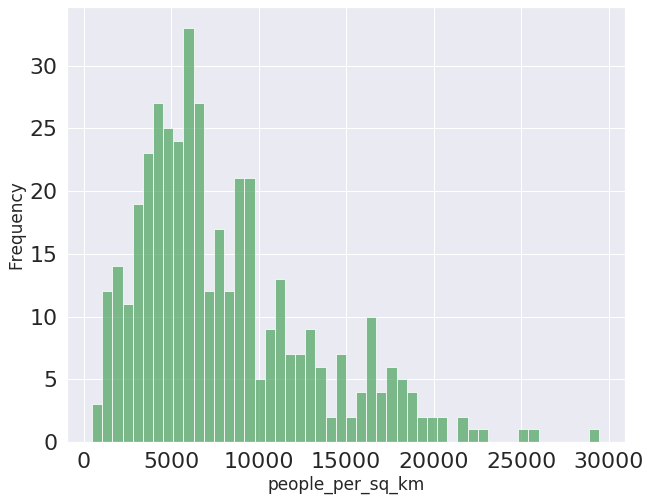

In [820]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('people_per_sq_km',fontsize=17)
n, bins, patches = plt.hist(df['people_per_sq_km'].values, 50, facecolor='g', alpha=0.75)
plt.show()

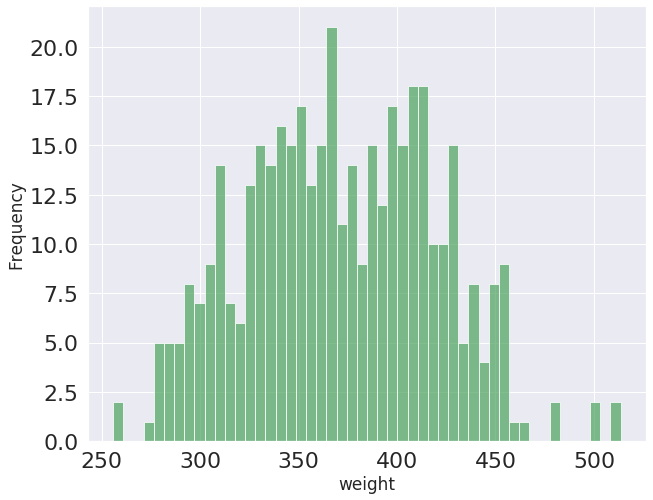

In [822]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('weight',fontsize=17)
n, bins, patches = plt.hist(df['weight'].values, 50, facecolor='g', alpha=0.75)
plt.show()

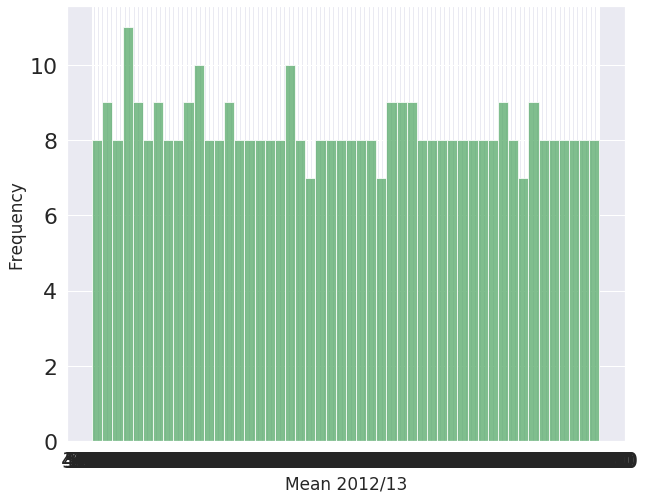

In [823]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('Mean 2012/13',fontsize=17)
n, bins, patches = plt.hist(df['Mean 2012/13'].values, 50, facecolor='g', alpha=0.75)
plt.show()

In [575]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [576]:
predictions = lm.predict(X)
print(predictions)[0:5]

[[0.30407346]
 [0.4386423 ]
 [0.52927949]
 [0.49591295]
 [0.34319875]
 [0.3836492 ]
 [0.31253725]
 [0.27465303]
 [0.38952747]
 [0.28062327]
 [0.40723406]
 [0.36140385]
 [0.30612533]
 [0.26352216]
 [0.38443582]
 [0.40018686]
 [0.35264611]
 [0.31347044]
 [0.45507672]
 [0.49611089]
 [0.48171879]
 [0.46399892]
 [0.40819914]
 [0.30831176]
 [0.31233409]
 [0.3371867 ]
 [0.26951584]
 [0.31709464]
 [0.28342481]
 [0.28444218]
 [0.1942068 ]
 [0.25580121]
 [0.24982825]
 [0.30420344]
 [0.46814789]
 [0.45209758]
 [0.46023085]
 [0.31644124]
 [0.3126484 ]
 [0.4081456 ]
 [0.47875222]
 [0.32031063]
 [0.36879945]
 [0.39376152]
 [0.4256227 ]
 [0.40318819]
 [0.43042196]
 [0.32998392]
 [0.3600291 ]
 [0.32915052]
 [0.39092096]
 [0.39228717]
 [0.42982307]
 [0.30992149]
 [0.34574048]
 [0.352343  ]
 [0.37014557]
 [0.35881181]
 [0.42962271]
 [0.33278153]
 [0.33917772]
 [0.44376092]
 [0.33666902]
 [0.27912601]
 [0.34918065]
 [0.35558359]
 [0.39667513]
 [0.49705689]
 [0.3686076 ]
 [0.36476589]
 [0.36674151]
 [0.34

TypeError: 'NoneType' object is not subscriptable

In [577]:
lm.score(X,Y)

0.2367889664313211